# Noise generation

In order to train denoising NN some training data with noise will be needed. In this notebook let's try to experiment with approaches to generating some synthetic noise.

From a quick search it seems like there are these types of noise present on the astrophotography images:

* **Shot noise** - Random fluctuations in the arrival of photons at the sensor. Even if the target object emits a steady light, the actual number of photons detected in a given time varies statistically. This variance gives a grainy appearance, especially in low-signal areas. Shot noise follows Poisson statistics – higher light levels yield proportionally less relative noise. Longer exposures (or stacking many exposures) help average out shot noise
* **Thermal Noise** - Noise from thermal electrons in the camera sensor. Even with no light, a long exposure will record electrons generated by heat in the sensor. This dark current accumulates as a signal that has its own shot-noise variation (sometimes called dark shot noise). Dark frames (calibration exposures with the shutter closed) can be subtracted to remove the average dark current, but the random noise component from dark current remains
* **Read Noise** - Random noise added by the electronics when reading out the pixel values.
* **Fixed-Pattern Noise**: Systematic sensor artifacts that recur each frame. These include Photo-Response Non-Uniformity (PRNU) – some pixels or regions have different sensitivity – and Dark Signal Non-Uniformity (DSNU) – certain pixels have consistently higher dark current (hot pixels, amplifier glow regions, etc.). These appear as fixed spatial patterns superimposed on the image (e.g. a faint grid or bright corner). Calibration frames (flat-fields for PRNU, dark/bias frames for DSNU) remove the fixed bias, but any residual differences manifest as noise that stacking alone can’t eliminate

## Noise simulation strategy

1. Most realistic approach would be to apply some real callibration frames to "clean" images. That will require gathering big enough dataset of callibration images of all the types - dark frames, biases, light frames etc. Probabably that would not be an easy task
2. Generate some close to real synthetic noise.

## Generating syntetic noise

A common approach is to use a Poisson-Gaussian noise model, which accounts for both photon shot noise and sensor read noise - see [Learning Camera-Aware Noise Models](https://www.ecva.net/papers/eccv_2020/papers_ECCV/papers/123690341.pdf#:~:text=The%20most%20common%20and%20simplest,Thus%20simple%20statistical) paper.

## Gaussian noise generation

* https://en.wikipedia.org/wiki/Gaussian_noise
* https://wiki.cloudfactory.com/docs/mp-wiki/augmentations/gaussian-noise
*

In [ ]:
%pip install IPython
%pip install opencv-python
%pip install numpy
%pip install matplotlib

### Sample images

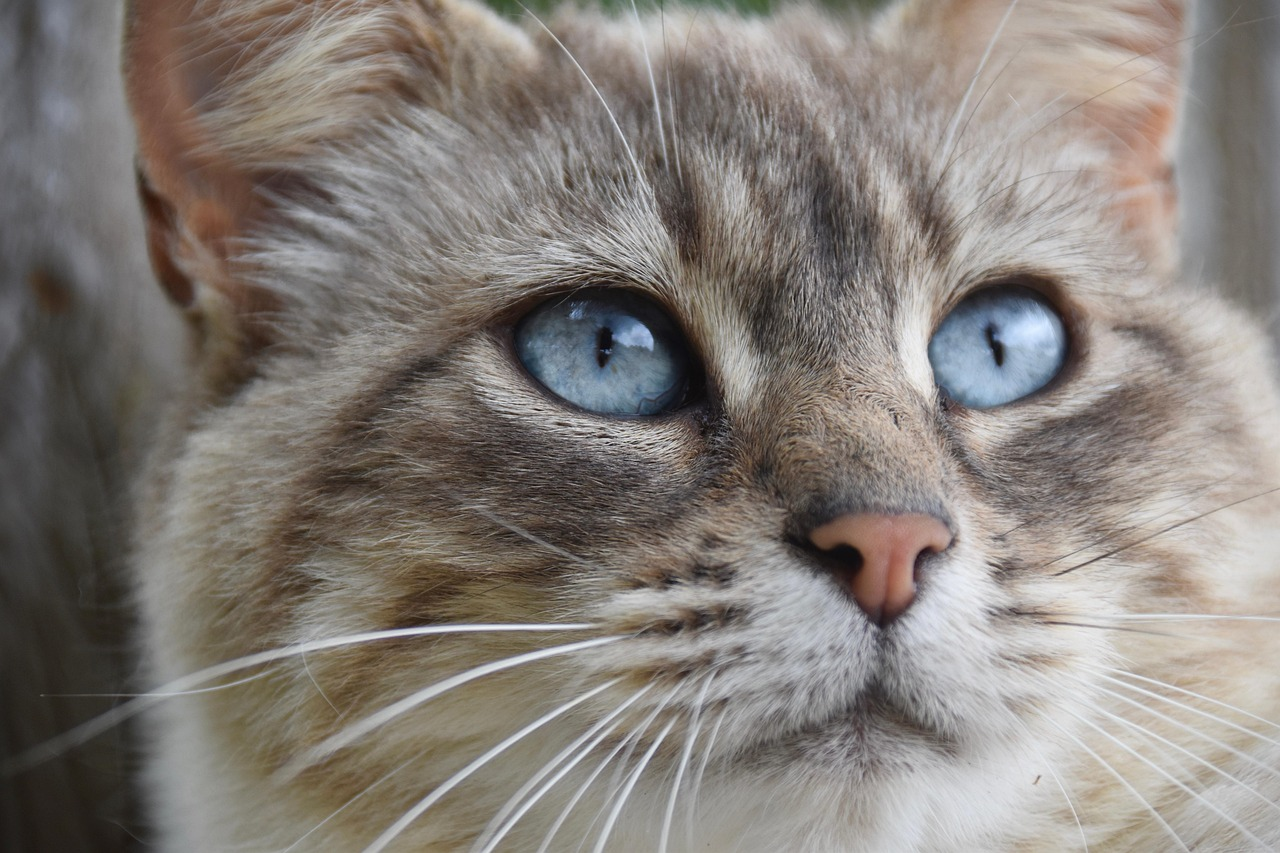

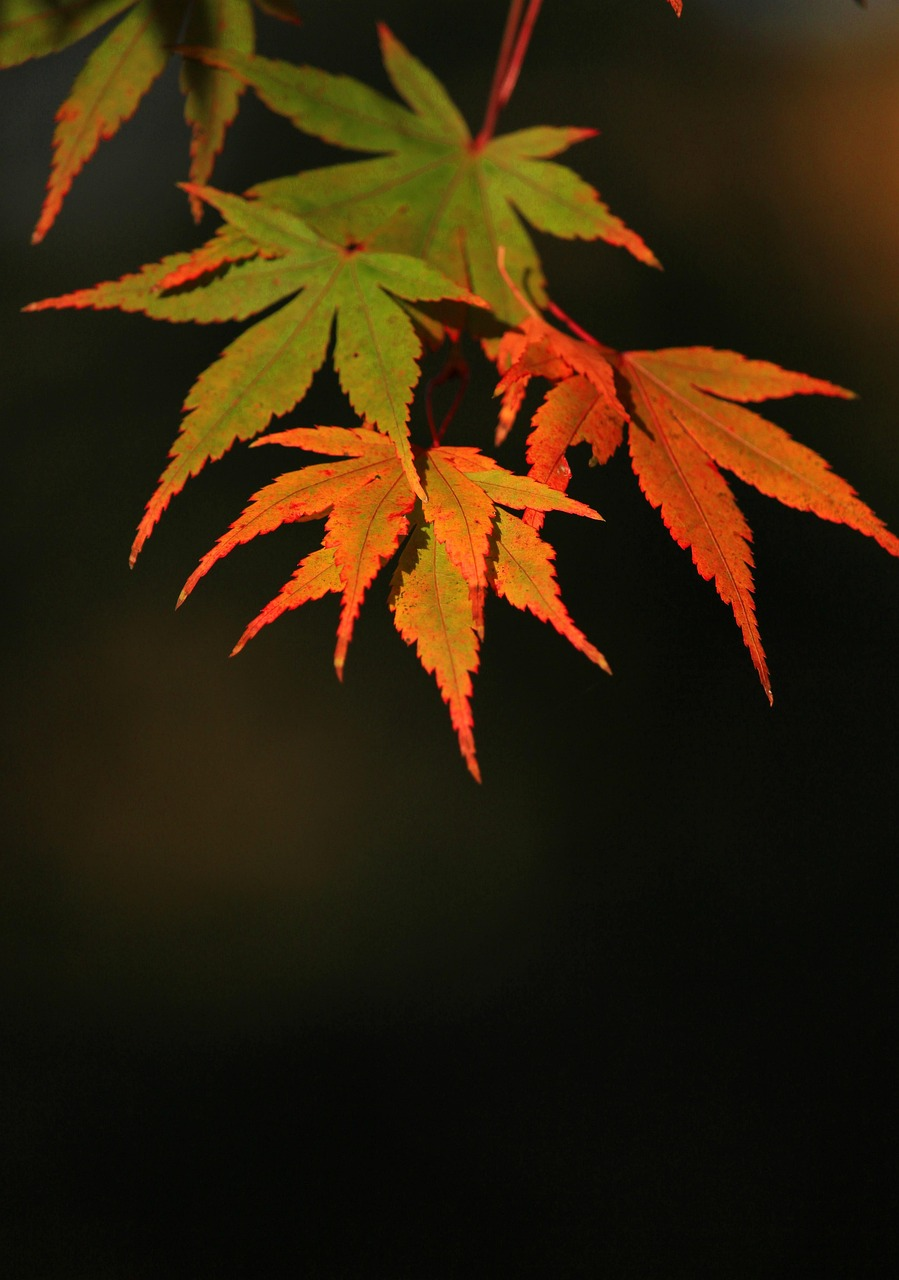

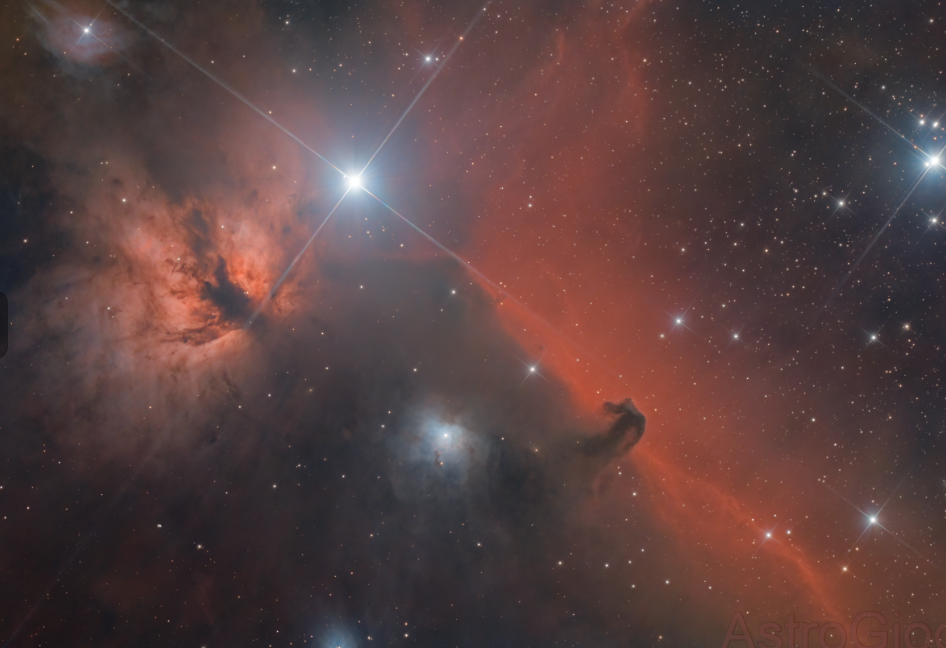

In [26]:
from IPython.display import Image, display

image = Image(filename='sample_image.jpg', width=600, height=300)
display(image)

image = Image(filename='sample_image2.jpg', width=600, height=300)
display(image)

image = Image(filename='astro_sample.png', width=600, height=300)
display(image)



### Let's try to apply some Gaussian noise to the images above:

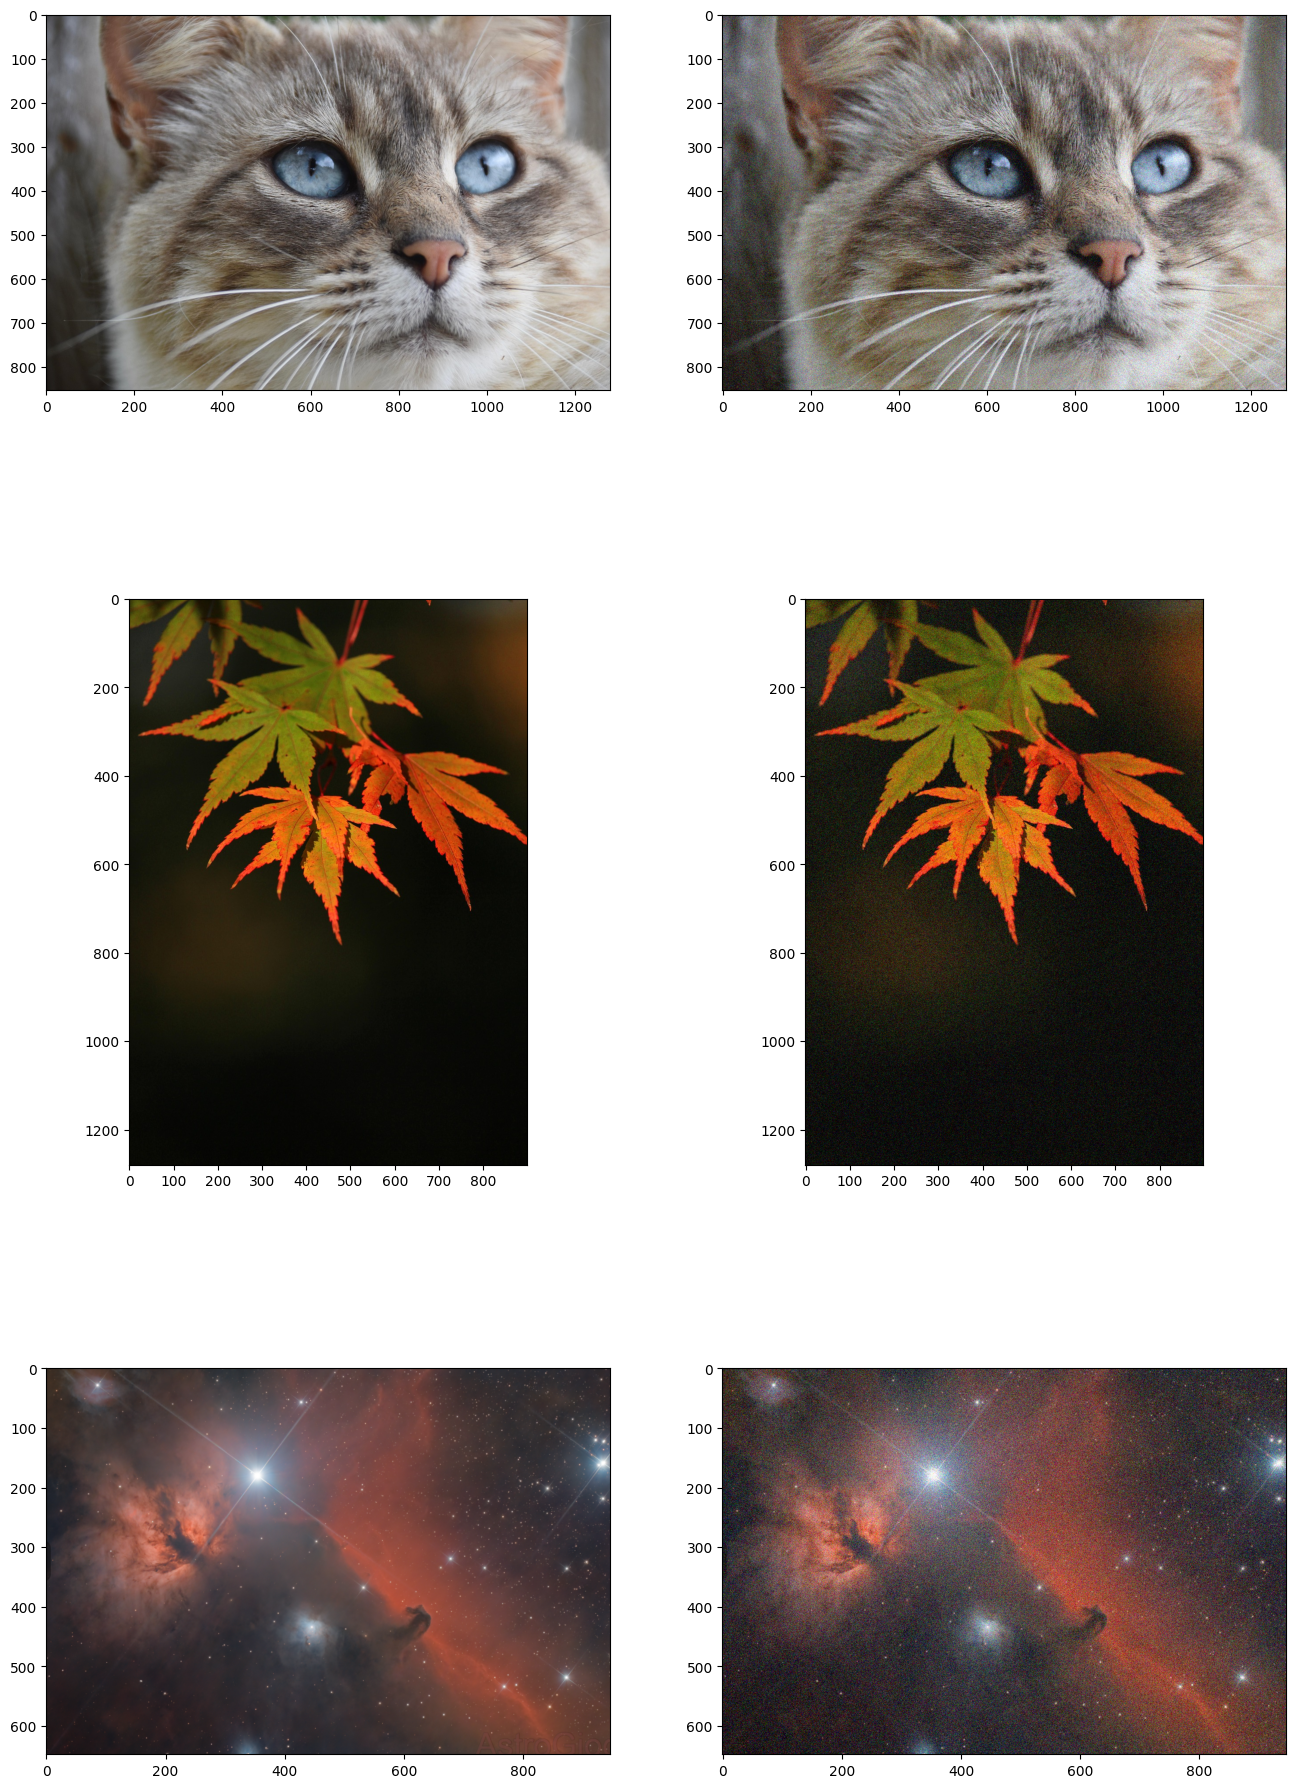

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cat = cv2.imread('sample_image.jpg', cv2.IMREAD_COLOR)
tree = cv2.imread('sample_image2.jpg', cv2.IMREAD_COLOR)
astro = cv2.imread('astro_sample.png', cv2.IMREAD_COLOR)

cat_noise = np.random.normal(0, 25, cat.shape).astype(np.float32)
tree_noise = np.random.normal(0, 25, tree.shape).astype(np.float32)
astro_noise = np.random.normal(0, 25, astro.shape).astype(np.float32)

# Add the Gaussian noise to the image
cat_noisy_img = cat.astype(np.float32) + cat_noise
tree_noisy_img = tree.astype(np.float32) + tree_noise
astro_noisy_img = astro.astype(np.float32) + astro_noise

# Clip the values to stay within valid range and convert back to uint8
cat_noisy_img = np.clip(cat_noisy_img, 0, 255).astype(np.uint8)
tree_noisy_img = np.clip(tree_noisy_img, 0, 255).astype(np.uint8)
astro_noisy_img = np.clip(astro_noisy_img, 0, 255).astype(np.uint8)

# Display the original and noisy images
plt.rcParams['figure.figsize'] = (16, 25)

fig, axarr = plt.subplots(3, 2)
axarr[0, 0].imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))
axarr[0, 1].imshow(cv2.cvtColor(cat_noisy_img, cv2.COLOR_BGR2RGB))
axarr[1, 0].imshow(cv2.cvtColor(tree, cv2.COLOR_BGR2RGB))
axarr[1, 1].imshow(cv2.cvtColor(tree_noisy_img, cv2.COLOR_BGR2RGB))
axarr[2, 0].imshow(cv2.cvtColor(astro, cv2.COLOR_BGR2RGB))
axarr[2, 1].imshow(cv2.cvtColor(astro_noisy_img, cv2.COLOR_BGR2RGB))
